1. A clustering mechanism to find patterns from submitted topics or requests.
2. A hierarchical clustering method that can produce a hierarchical dendrogram of topics submitted over a period of time.

In [132]:
import pandas as pd, numpy as np, seaborn as sns, tensorflow as tf, matplotlib.pyplot as plt, re, os, codecs, mpld3
from sklearn import feature_extraction
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

pd.options.display.max_rows=999
pd.options.display.max_colwidth=1000

filepath = 'C:/Users/gemin/4B_Cap_data'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gemin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gemin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [19]:
articles = pd.read_csv(filepath + '/all-the-news-2-1.csv'
#                        , nrows=1000
                      )

C:\Users\gemin\AppData\Local\Temp/ipykernel_9948/1351969023.py:1: DtypeWarning: Columns (1,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  articles = pd.read_csv(filepath + '/all-the-news-2-1.csv')


In [20]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688879 entries, 0 to 2688878
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0.1  int64  
 1   Unnamed: 0    object 
 2   date          object 
 3   year          object 
 4   month         float64
 5   day           object 
 6   author        object 
 7   title         object 
 8   article       object 
 9   url           object 
 10  section       object 
 11  publication   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 246.2+ MB


In [21]:
articles.head(2)

,Unnamed: 0.1,Unnamed: 0,date,year,month,day,author,title,article,url,section,publication
0,0,0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of liberal democracy seriously,"This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices. Imagine you are an otherwise healthy 30-something who starts feeling weird. You are sometimes short of breath. You get migraines. Your feet start to swell a little. But otherwise, everything seems fine. You go to the doctor. The doctor runs some tests. She tells you, It's probably nothing, but these could be signs of a coming heart attack. You push for more certainty, but the doctor tells you she's not sure. The human body is a complex system. You're young and otherwise pretty healthy. There could be plenty of other explanations for what you're feeling. But it is a little worrying. So just to be on the safe side, maybe you should reduce the stress in your life and eat a healthier diet. What would you do? If you're a sensible person, you'd probably err on the side of precaution. Sure, it might be nothing ...",https://www.vox.com/polyarchy/2016/12/9/13898340/democracy-warning-signs,NaN,Vox
1,1,1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contract makes it difficult to build the team,"The Indianapolis Colts made Andrew Luck the highest-paid player in NFL history this offseason with a five-year, $122-million contract with $89 million guaranteed. However, they're already finding that Luck's contract is inhibiting their ability to address weaknesses on other parts of the roster, particularly on defense. On Friday, Colts GM Ryan Grigson, who is under fire for the Colts 1-3 start, said that it's difficult to build up the team's defense with Luck making so much money. According to Keefer, Grigson did point out that the Colts still have young talent they're hoping to develop on defense. However, blaming Luck's contract — which the Colts gave him — for having a weak defense (30th in defensive DVOA) is not accurate. As others have pointed out, last year's Denver Broncos paid Peyton Manning $15 million in base salary while also boasting an elite defense. Luck also takes up $18.4 million against the salary cap this year, less than $1 million more than Manning did a year a...",https://www.businessinsider.com/colts-gm-ryan-grigson-andrew-luck-contract-2016-10,NaN,Business Insider


In [22]:
articles[:1][['author','title','article','section','publication']]

,author,title,article,section,publication
0,Lee Drutman,We should take concerns about the health of liberal democracy seriously,"This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices. Imagine you are an otherwise healthy 30-something who starts feeling weird. You are sometimes short of breath. You get migraines. Your feet start to swell a little. But otherwise, everything seems fine. You go to the doctor. The doctor runs some tests. She tells you, It's probably nothing, but these could be signs of a coming heart attack. You push for more certainty, but the doctor tells you she's not sure. The human body is a complex system. You're young and otherwise pretty healthy. There could be plenty of other explanations for what you're feeling. But it is a little worrying. So just to be on the safe side, maybe you should reduce the stress in your life and eat a healthier diet. What would you do? If you're a sensible person, you'd probably err on the side of precaution. Sure, it might be nothing ...",NaN,Vox


In [30]:
print(len(articles.section.unique()))
print(articles.section.fillna('None').unique())

7510
['None' 'Davos' 'World News' ... 'GoFundMe' 'Closing Bell'
 'Manufacturing the Future']


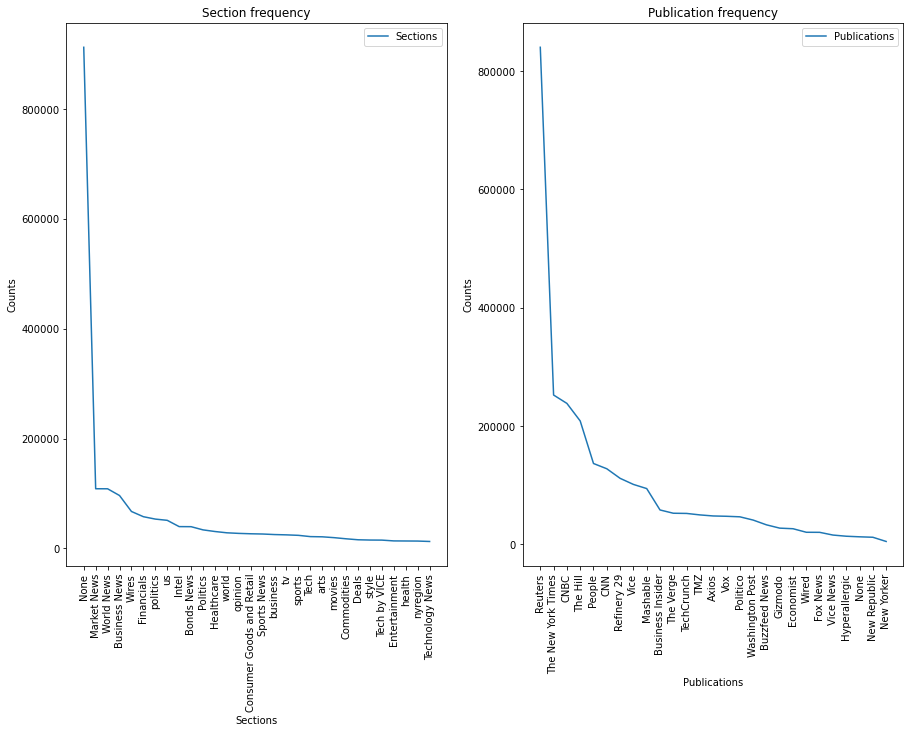

In [51]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
plt.plot(articles.section.fillna('None').value_counts().nlargest(30), label='Sections')
plt.xlabel('Sections')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('Section frequency')
plt.legend()

ax = fig.add_subplot(1,2,2)
plt.plot(articles.publication.fillna('None').value_counts().nlargest(30), label='Publications')
plt.xlabel('Publications')
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.title('Publication frequency')
plt.legend()


In [83]:
articles[articles['Unnamed: 0'] == 0][['section','title', 'article']]

,section,title,article
0,NaN,We should take concerns about the health of liberal democracy seriously,"This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices. Imagine you are an otherwise healthy 30-something who starts feeling weird. You are sometimes short of breath. You get migraines. Your feet start to swell a little. But otherwise, everything seems fine. You go to the doctor. The doctor runs some tests. She tells you, It's probably nothing, but these could be signs of a coming heart attack. You push for more certainty, but the doctor tells you she's not sure. The human body is a complex system. You're young and otherwise pretty healthy. There could be plenty of other explanations for what you're feeling. But it is a little worrying. So just to be on the safe side, maybe you should reduce the stress in your life and eat a healthier diet. What would you do? If you're a sensible person, you'd probably err on the side of precaution. Sure, it might be nothing ..."


In [126]:
articles.section = articles.section.str.lower()
health_tech = articles[articles[['section']].fillna('None')['section'].str.contains('|'.join(['health','tech']))][['section','title', 'article']]
print('Heath or Tech included : ', len(health_tech))
health_tech.head(1)

Heath or Tech included :  129682


,section,title,article
7,health,You Can Trick Your Brain Into Being More Focused,"If only every day could be like this. You can’t put your finger on why: Maybe you had just the right amount of sleep. Maybe the stars are somehow aligned in your favor. Whatever the reason, you’re cooking on gas. Hours fly by like minutes, you’re feeling great, and before you know it it’s 5:30 pm and your to-do list is done. This feeling of ‘flow’ or being ‘in the zone’ is something that most of us have experienced at some point or other—although not as often as we might like. It’s a mental state that elite athletes seem to have at their beck and call. For us mere mortals, though, it hardly ever shows up when we need it. Since the psychologist Mihály Csíkszentmihályi first described the zone (which he called ‘flow’) in 1975, neuroscientists have been trying to figure out what it is and how to make it show up on demand. Yet as they close in on the secrets of the zone, another truth has emerged: What we think of as the zone is actually one of many mental states that a person can be..."


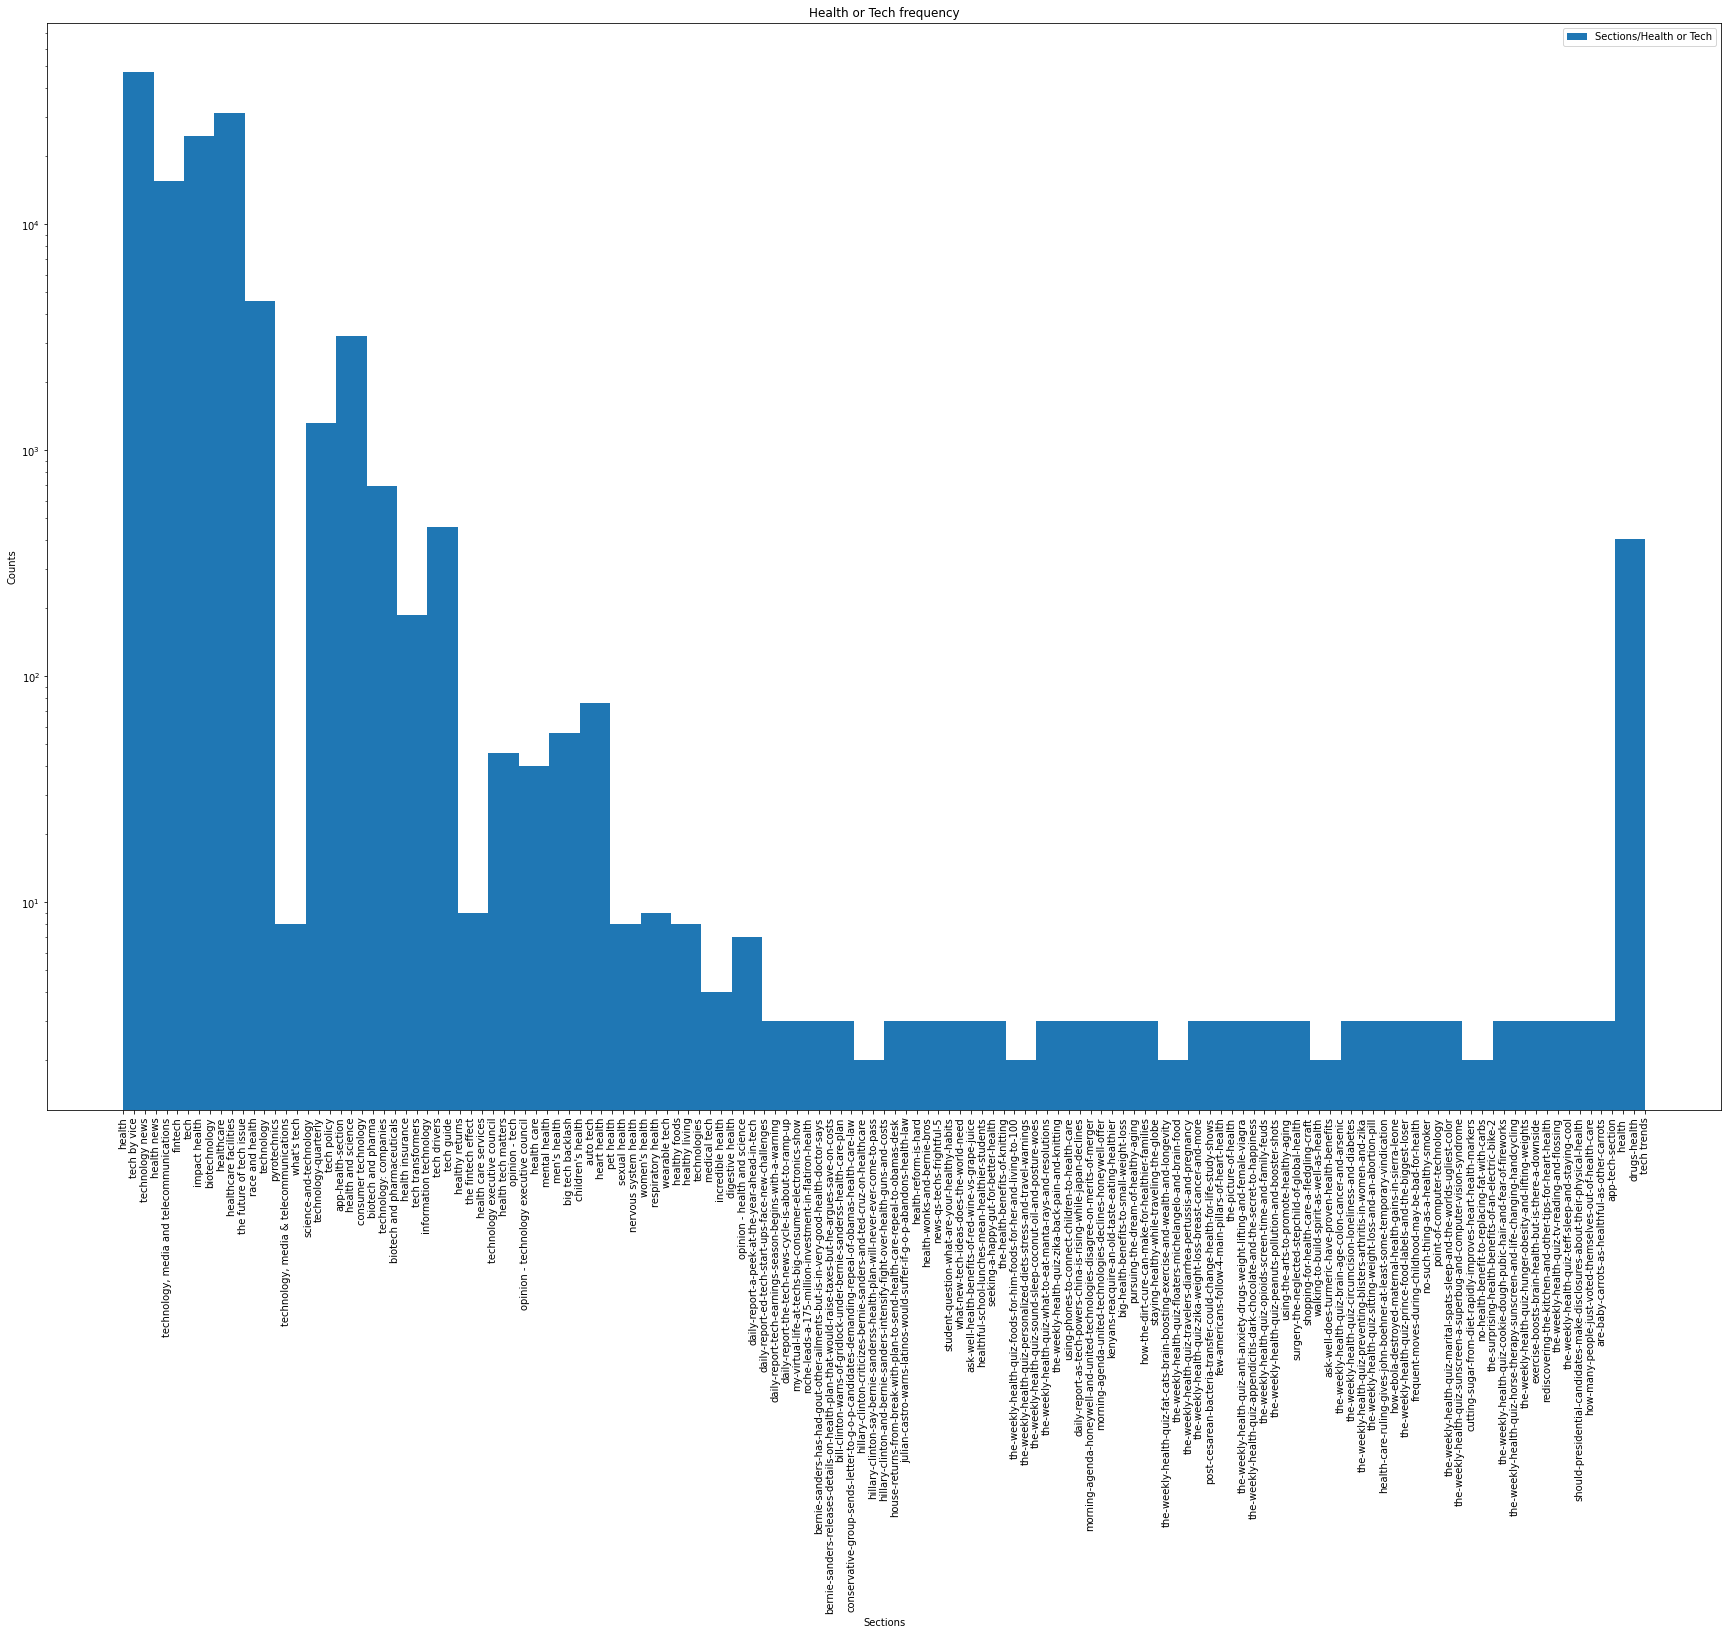

In [127]:
plt.figure(figsize=(30,20))
plt.hist(health_tech.section, log=True, bins=50, label='Sections/Health or Tech')
plt.xlabel('Sections')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('Health or Tech frequency')
plt.legend()

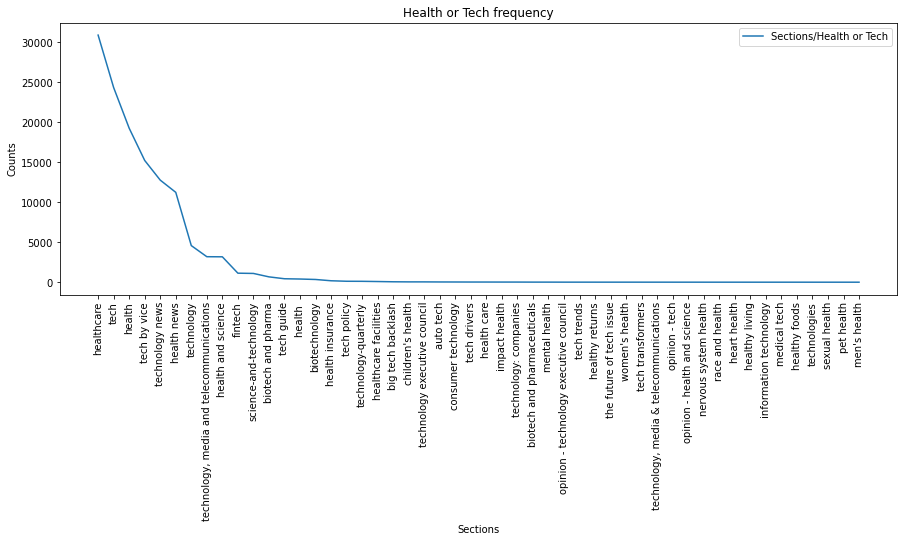

In [121]:
plt.figure(figsize=(15,5))
plt.plot(health_tech.section.value_counts().nlargest(50), label='Sections/Health or Tech')
plt.xlabel('Sections')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('Health or Tech frequency')
plt.legend()

In [168]:
test_article =articles[:100][['section','title', 'article']].fillna('None')

# Stopwords, stemming, and tokenizing

In [35]:
stopwords = nltk.corpus.stopwords.words('english')
stemmer = SnowballStemmer('english')

In [128]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [169]:
test_article

,section,title,article
0,None,We should take concerns about the health of liberal democracy seriously,"This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices. Imagine you are an otherwise healthy 30-something who starts feeling weird. You are sometimes short of breath. You get migraines. Your feet start to swell a little. But otherwise, everything seems fine. You go to the doctor. The doctor runs some tests. She tells you, It's probably nothing, but these could be signs of a coming heart attack. You push for more certainty, but the doctor tells you she's not sure. The human body is a complex system. You're young and otherwise pretty healthy. There could be plenty of other explanations for what you're feeling. But it is a little worrying. So just to be on the safe side, maybe you should reduce the stress in your life and eat a healthier diet. What would you do? If you're a sensible person, you'd probably err on the side of precaution. Sure, it might be nothing ..."
1,None,Colts GM Ryan Grigson says Andrew Luck's contract makes it difficult to build the team,"The Indianapolis Colts made Andrew Luck the highest-paid player in NFL history this offseason with a five-year, $122-million contract with $89 million guaranteed. However, they're already finding that Luck's contract is inhibiting their ability to address weaknesses on other parts of the roster, particularly on defense. On Friday, Colts GM Ryan Grigson, who is under fire for the Colts 1-3 start, said that it's difficult to build up the team's defense with Luck making so much money. According to Keefer, Grigson did point out that the Colts still have young talent they're hoping to develop on defense. However, blaming Luck's contract — which the Colts gave him — for having a weak defense (30th in defensive DVOA) is not accurate. As others have pointed out, last year's Denver Broncos paid Peyton Manning $15 million in base salary while also boasting an elite defense. Luck also takes up $18.4 million against the salary cap this year, less than $1 million more than Manning did a year a..."
2,davos,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President Donald Trump denied a report on Friday that he had ordered Special Counsel Robert Mueller fired last June, calling it “fake news”. The New York Times reported on Thursday that Trump backed down from his order after the White House counsel threatened to resign rather than follow his directive, citing four people told of the matter. “Fake news, folks, fake news,” Trump told reporters in Davos, when asked about the report. Reporting by Steve Holland"
3,world news,France's Sarkozy reveals his 'Passions' but insists no come-back on cards,"PARIS (Reuters) - Former French president Nicolas Sarkozy published a new memoir on Thursday but was quick to dismiss speculation he might return to politics to rescue his old center-right party, which has shed support since President Emmanuel Macron stormed to power. Entitled “Passions”, the autobiography documents Sarkozy’s rise to power, while hurling barbs at some of his former allies, including his prime minister Francois Fillon. During his time in office from 2007-2012, Sarkozy earned the nickname “President Bling-Bling” for his brash style and close association with tycoons and celebrities. While at the Elysee, he met and married former model Carla Bruni. “Passions” is released as France’s center-right fights for survival two years after President Emmanuel Macron’s election win dynamited the political landscape. Sarkozy’s old party, Les Republicains, is locked in infighting and struggling to find direction, squeezed by Macron’s centrist party and the far right. “The boo..."
4,None,Paris Hilton: Woman In Black For Uncle Monty's Funeral,"Paris Hilton arrived at LAX Wednesday dressed to pay her last respects to her uncle Monty Brinson. Par

In [222]:
article_only = test_article['article'][0]
stemmed = tokenize_and_stem(article_only)
len(stemmed)

1119

In [274]:
def totalvocab(source):
    totalvocab_stemmed = []
    totalvocab_tokenized = []
    for i in list(source):
        allwords_stemmed = tokenize_and_stem(i) 
        totalvocab_stemmed.extend(allwords_stemmed) 

        allwords_tokenized = tokenize_only(i)
        totalvocab_tokenized.extend(allwords_tokenized)
    return totalvocab_stemmed, totalvocab_tokenized

In [275]:
totalvocab_stemmed ,totalvocab_tokenized = totalvocab(test_article['article'])
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
vocab_frame

,words
this,this
post,post
is,is
part,part
of,of
...,...
name,names
remain,remains
to,to
be,be


In [267]:
title_only = test_article['title'][0]
stemmed = tokenize_and_stem(title_only)
len(stemmed)

11

In [268]:
totalvocab_stemmed ,totalvocab_tokenized = totalvocab(test_article['title'])
vocab_frame2 = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
vocab_frame2

,words
we,we
should,should
take,take
concern,concerns
about,about
...,...
misconduct,misconduct
alleg,allegations
but,but
not,not


# Tf-idf and document similarity

In [277]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
                                   max_df=.8,
#                                    max_df=1,
                                   max_features=200000,
                                   min_df=0.2, stop_words='english',
                                   use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(test_article['article'])
# %time tfidf_matrix = tfidf_vectorizer.fit_transform(test_article['title'])

print(tfidf_matrix.shape)

Wall time: 1.46 s
(100, 113)


In [278]:
terms = tfidf_vectorizer.get_feature_names_out()
terms

array(["'s", 'accord', 'actual', 'ad', 'american', 'ani', 'anoth',
       'appear', 'ask', 'becaus', 'becom', 'befor', 'big', 'case',
       'chang', 'close', 'come', 'compani', 'continu', 'countri', 'creat',
       'day', 'did', 'dure', 'edit', 'end', 'far', 'feel', 'follow',
       'forc', 'good', 'govern', 'group', 'hard', 'head', 'help', 'hous',
       'howev', 'includ', 'increas', 'issu', 'just', 'know', 'life',
       'like', 'line', 'littl', 'live', 'long', 'look', 'lot', 'major',
       'make', 'mani', 'mean', 'million', 'month', "n't", 'nation',
       'need', 'new', 'new york', 'news', 'onli', 'open', 'past', 'peopl',
       'percent', 'place', 'plan', 'play', 'polit', 'possibl', 'power',
       'presid', 'public', 'realli', 'recent', 'report', 'reuter',
       'right', 'run', 's', 'said', 'say', 'share', 'sinc', 'someth',
       'start', 'state', 'support', 't', 'tell', 'thing', 'think',
       'thursday', 'time', 'today', 'told', 'tri', 'trump', 'u.s.',
       'unit', 'use'

In [279]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print(dist.shape)
print(dist)

(100, 100)
[[-2.22044605e-16  6.12785390e-01  8.54386362e-01 ...  5.95528520e-01
   5.77039146e-01  7.76554856e-01]
 [ 6.12785390e-01 -2.22044605e-16  1.00000000e+00 ...  8.03316845e-01
   3.67310261e-01  9.63476616e-01]
 [ 8.54386362e-01  1.00000000e+00  0.00000000e+00 ...  9.66695951e-01
   1.00000000e+00  5.28697888e-01]
 ...
 [ 5.95528520e-01  8.03316845e-01  9.66695951e-01 ... -2.22044605e-16
   7.26333113e-01  8.45619423e-01]
 [ 5.77039146e-01  3.67310261e-01  1.00000000e+00 ...  7.26333113e-01
   0.00000000e+00  1.00000000e+00]
 [ 7.76554856e-01  9.63476616e-01  5.28697888e-01 ...  8.45619423e-01
   1.00000000e+00 -2.22044605e-16]]


# K-means clustering

In [280]:
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=10)
%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 98.9 ms


In [281]:
test_article['cluster'] = clusters
test_article

,section,title,article,cluster
0,None,We should take concerns about the health of liberal democracy seriously,"This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices. Imagine you are an otherwise healthy 30-something who starts feeling weird. You are sometimes short of breath. You get migraines. Your feet start to swell a little. But otherwise, everything seems fine. You go to the doctor. The doctor runs some tests. She tells you, It's probably nothing, but these could be signs of a coming heart attack. You push for more certainty, but the doctor tells you she's not sure. The human body is a complex system. You're young and otherwise pretty healthy. There could be plenty of other explanations for what you're feeling. But it is a little worrying. So just to be on the safe side, maybe you should reduce the stress in your life and eat a healthier diet. What would you do? If you're a sensible person, you'd probably err on the side of precaution. Sure, it might be nothing ...",3
1,None,Colts GM Ryan Grigson says Andrew Luck's contract makes it difficult to build the team,"The Indianapolis Colts made Andrew Luck the highest-paid player in NFL history this offseason with a five-year, $122-million contract with $89 million guaranteed. However, they're already finding that Luck's contract is inhibiting their ability to address weaknesses on other parts of the roster, particularly on defense. On Friday, Colts GM Ryan Grigson, who is under fire for the Colts 1-3 start, said that it's difficult to build up the team's defense with Luck making so much money. According to Keefer, Grigson did point out that the Colts still have young talent they're hoping to develop on defense. However, blaming Luck's contract — which the Colts gave him — for having a weak defense (30th in defensive DVOA) is not accurate. As others have pointed out, last year's Denver Broncos paid Peyton Manning $15 million in base salary while also boasting an elite defense. Luck also takes up $18.4 million against the salary cap this year, less than $1 million more than Manning did a year a...",4
2,davos,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President Donald Trump denied a report on Friday that he had ordered Special Counsel Robert Mueller fired last June, calling it “fake news”. The New York Times reported on Thursday that Trump backed down from his order after the White House counsel threatened to resign rather than follow his directive, citing four people told of the matter. “Fake news, folks, fake news,” Trump told reporters in Davos, when asked about the report. Reporting by Steve Holland",2
3,world news,France's Sarkozy reveals his 'Passions' but insists no come-back on cards,"PARIS (Reuters) - Former French president Nicolas Sarkozy published a new memoir on Thursday but was quick to dismiss speculation he might return to politics to rescue his old center-right party, which has shed support since President Emmanuel Macron stormed to power. Entitled “Passions”, the autobiography documents Sarkozy’s rise to power, while hurling barbs at some of his former allies, including his prime minister Francois Fillon. During his time in office from 2007-2012, Sarkozy earned the nickname “President Bling-Bling” for his brash style and close association with tycoons and celebrities. While at the Elysee, he met and married former model Carla Bruni. “Passions” is released as France’s center-right fights for survival two years after President Emmanuel Macron’s election win dynamited the political landscape. Sarkozy’s old party, Les Republicains, is locked in infighting and struggling to find direction, squeezed by Macron’s centrist party and the far right. “The boo...",1
4,None,Paris Hilton: Woman In Black For Uncle Monty's Funeral,"Paris Hilton arrived at LAX Wednesday dressed to pay her last respects to her uncle Mo

In [282]:
test_article.cluster.value_counts()

1    29
0    25
4    16
3    15
2    15
Name: cluster, dtype: int64

In [283]:
print("Top terms per cluster:")

order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("\nCluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster       
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode().decode('utf8'), end=',')

    print("\nCluster %d titles:" % i, end='')
    for title in test_article.loc[i, ['title']].values.tolist():
        print(' %s,' % title, end='')
    
    print()


Top terms per cluster:

Cluster 0 words: s, times, t, likely, new, works,
Cluster 0 titles: We should take concerns about the health of liberal democracy seriously,

Cluster 1 words: s, said, trump, governance, company, national,
Cluster 1 titles: Colts GM Ryan Grigson says Andrew Luck's contract makes it difficult to build the team,

Cluster 2 words: u.s., said, states, report, reuters, s,
Cluster 2 titles: Trump denies report he ordered Mueller fired,

Cluster 3 words: 's, n't, say, likely, play, just,
Cluster 3 titles: France's Sarkozy reveals his 'Passions' but insists no come-back on cards,

Cluster 4 words: 's, works, play, actually, white, n't,
Cluster 4 titles: Paris Hilton: Woman In Black For Uncle Monty's Funeral,
